<div class="jumbotron text-left"><b>
This tutorial describes how to use the SMT toolbox with multifidelity data to build a surrogate model that uses the sparse Gaussian processes
approximation in the lowest fidelity-level</b></div>

Mauricio CASTANO AGUIRRE ONERA/DTIS/M2CI - PhD.student

March 2025

`SMT version 2.9.1` 

In [1]:
!pip install smt

# Sparse Multi-Fidelity Kriging

We are interested in learning a high-fidelity function while using low-fidelity information sources to enhance the model, for that we use Le Gratiet recursive formulation of multi-fidelity Kriging.

It is common to find a large number of observations at the lower fidelity levels. However, due to the computational complexity of Gaussian Processes, processing these observations becomes challenging. Strategies such as Sparse Gaussian Processes (SGP) estimate the true distribution of these observations by approximating it through inducing points [1].

<p class="alert alert-warning" style="padding:1em">
An important assumption by using this recursive formulation is the nested DOE.
If we have thow fidelity levels (HF and LF)
$$X_{HF} \subset X_{LF}$$
 </p>   

### Kennedy O'Hagan/Le Gratiet recursive formulation:
To perform Le Gratiet's learning, we first learn the lowest fidelity, then we consecutively learn the relationship between every two consecutive fidelity levels (scaling factor $\rho_{k-1}$ and discrepancy function $\delta_k(\cdot)$).

$$\mu_{k} = \rho_{k-1}\;\mu_{k-1} + \mu_{\delta_k}\\
\sigma^2_{k} = \rho_{k-1}^2\;\sigma^2_{k-1}+\sigma^2_{\delta_k}$$

This generally results in a better surrogate model compared to training the high-fidelity alone. In this approach we estimate the lowest fidelity level using a Nyström Approximation [1].

### SMT
SMT is a joint library between NASA, UoM, ONERA and ISAE-SUPAERO. It offers many surrogate modeling tools with a focus on derivatives. Le Gratiet's formulation was implemented as part of SMT.

After dowmloading and installing SMT library from: https://github.com/SMTorg/smt

We import the needed packages

[1] Titsias, M. (2009). Variational Learning of Inducing Variables in Sparse Gaussian Processes. International Conference on Artificial Intelligence and Statistics (AISTATS).

In [2]:
from smt.applications.smfk import SMFK
import numpy as np
from matplotlib import pyplot as plt
from smt.applications import NestedLHS

import time

%matplotlib inline

In [3]:
# defining low and high fidelity functions

# Define the Forrester function at different fidelity levels
def forrester_low(x):
    return 0.5 * forrester_high(x) + 10 * (x - 0.5) - 5


def forrester_mid(x):
    return 0.8 * forrester_high(x) + 5 * (x - 0.5)


def forrester_high(x):
    return (6 * x - 2) ** 2 * np.sin(12 * x - 4)

## 1- Build a multifidelity model using two fidelity levels

Text(0, 0.5, '$y$')

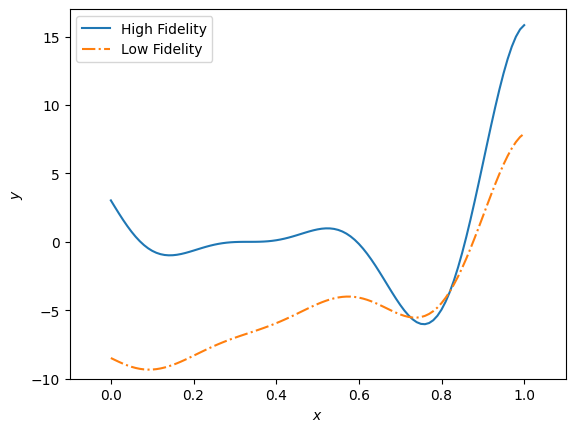

In [4]:
# Ploting High and low fidelity functions

x = np.linspace(0, 1, 101, endpoint=True).reshape(-1, 1)
plt.figure()

plt.plot(x, forrester_high(x), label="High Fidelity")
plt.plot(x, forrester_low(x), linestyle="-.", label="Low Fidelity")

plt.legend(loc=0)
plt.ylim(-10, 17)
plt.xlim(-0.1, 1.1)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

In [5]:
# Create DoE
ndim = 1
nlvl = 2
ndoe = 7  # Observations in High fidelity

n_start = 1
ndoe_lf = 2 ** (nlvl - 1) * ndoe

N_lf = np.array([10, 100]) * ndoe_lf  # Aditional Observations in Low Fidelity

# Nested DOE
xlimits = np.array([[0.0, 1.0]])
ylimits = [-11.0, 17.0]

ntest = 100
x = np.linspace(xlimits[0][0], xlimits[0][1], ntest, endpoint=True).reshape(-1, 1)

fh = forrester_high(x)
fl = forrester_low(x)

# Selection of different inducing points.
inducing_points = [5, 8, 10]


# Initialization of variables to measure time and RMSE calculation
mfkt_time = []
smfkt_time = []
error_mfk = []
error_smfk = []
all_data = []

#### Sampling
The idea when building a mutli-fidelity design of experiment is to cover as much space as possible with low-fidelity data and use enough high fidelity samples to learn the relationship between fidelity-levels.

HF obs: 7 LF obs: 140
Prediction using 5 inducing points
___________________________________________________________________________
   
                                   SMFK
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 7
   
___________________________________________________________________________
   
 Training
   
   Training ...
Optimizing Level: 0
Optimizing Level: 1
   Training - done. Time (sec):  0.4883001
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0009995
   
   Prediction time/pt. (sec) :  0.0000100
   


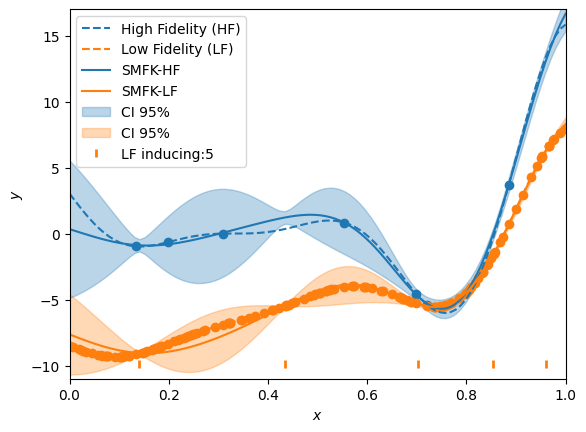

Prediction using 8 inducing points
___________________________________________________________________________
   
                                   SMFK
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 7
   
___________________________________________________________________________
   
 Training
   
   Training ...
Optimizing Level: 0
Optimizing Level: 1
   Training - done. Time (sec):  0.4415681
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0011334
   
   Prediction time/pt. (sec) :  0.0000113
   


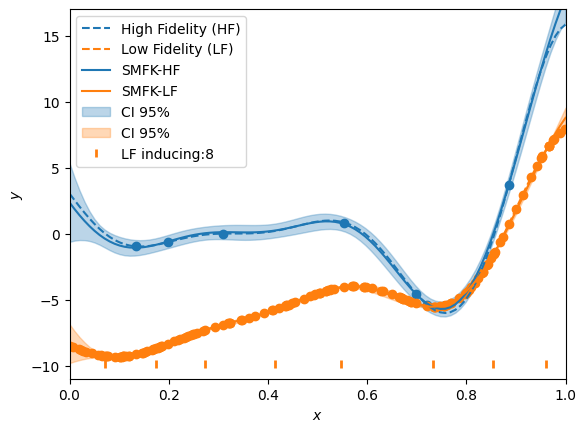

Prediction using 10 inducing points
___________________________________________________________________________
   
                                   SMFK
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 7
   
___________________________________________________________________________
   
 Training
   
   Training ...
Optimizing Level: 0
Optimizing Level: 1
   Training - done. Time (sec):  0.4560070
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0009918
   
   Prediction time/pt. (sec) :  0.0000099
   


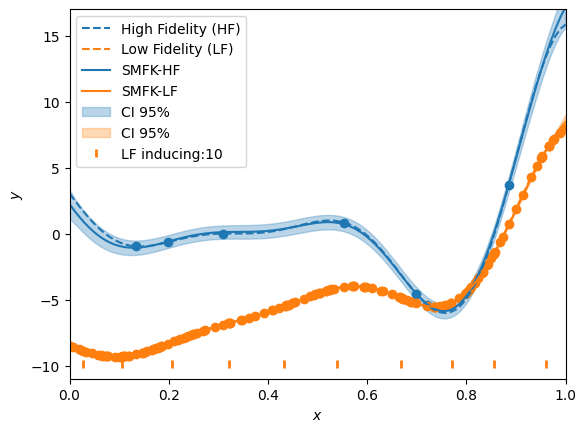

HF obs: 7 LF obs: 1400
Prediction using 5 inducing points
___________________________________________________________________________
   
                                   SMFK
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 7
   
___________________________________________________________________________
   
 Training
   
   Training ...
Optimizing Level: 0
Optimizing Level: 1
   Training - done. Time (sec):  0.5367298
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0005388
   
   Prediction time/pt. (sec) :  0.0000054
   


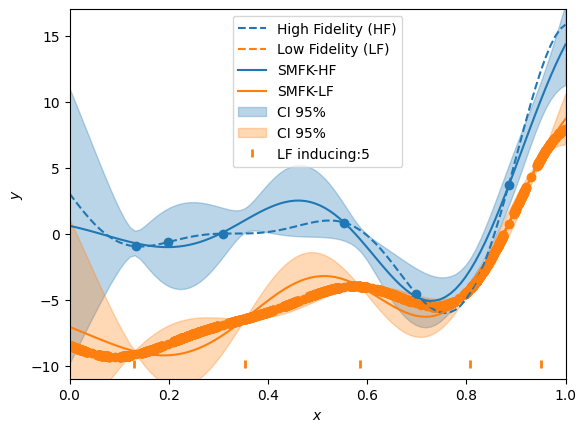

Prediction using 8 inducing points
___________________________________________________________________________
   
                                   SMFK
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 7
   
___________________________________________________________________________
   
 Training
   
   Training ...
Optimizing Level: 0
Optimizing Level: 1
   Training - done. Time (sec):  0.6644125
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0009859
   
   Prediction time/pt. (sec) :  0.0000099
   


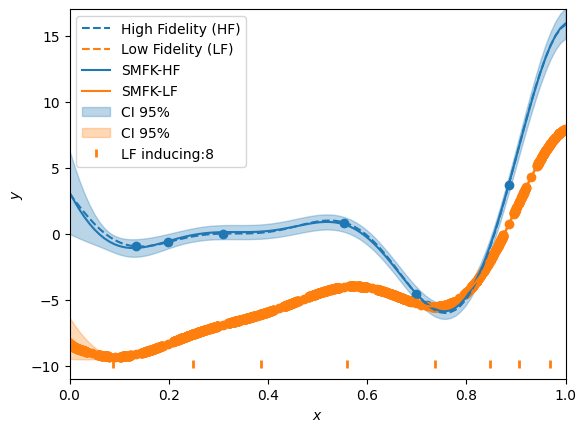

Prediction using 10 inducing points
___________________________________________________________________________
   
                                   SMFK
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 7
   
___________________________________________________________________________
   
 Training
   
   Training ...
Optimizing Level: 0
Optimizing Level: 1
   Training - done. Time (sec):  0.6346793
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000000
   
   Prediction time/pt. (sec) :  0.0000000
   


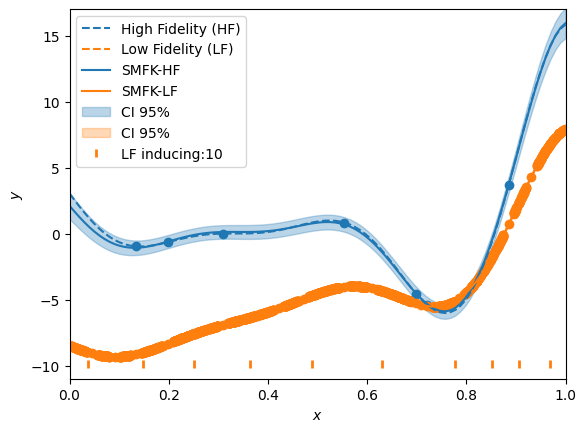

In [6]:
for N_iter in N_lf:
    print("HF obs:", ndoe, "LF obs:", N_iter)

    xdoes = NestedLHS(nlevel=nlvl, xlimits=xlimits, seed=0)
    Xt_c, Xt_e = xdoes(ndoe)
    Xt_e = np.sort(Xt_e, axis=0)
    interval = (xlimits[0][0], xlimits[0][1])
    exclude_values = Xt_c
    precision = 1e-2

    # Generate random values and filter exclusions
    new_values = []
    while len(new_values) < N_iter:
        candidates = np.random.uniform(interval[0], interval[1], N_iter * 2)
        new_values.extend(
            [v for v in candidates if np.all(np.abs(v - exclude_values) >= precision)]
        )
    new_values = np.array(new_values[:N_iter]).reshape(-1, 1)

    # Creating a LF with more observations.
    Xt_c = np.sort(Xt_c, axis=0)
    Xt_c = np.vstack((new_values, Xt_c))

    yt_e = forrester_high(Xt_e)
    yt_c = forrester_low(Xt_c)

    noise_std = 1e-6

    yt_c_noisy = yt_c + np.random.normal(0, noise_std, size=Xt_c.shape)
    yt_e_noisy = yt_e + np.random.normal(0, noise_std, size=Xt_e.shape)

    noise_bounds = np.array((1e-3, 100))

    # Test over different inducing points.
    for M in inducing_points:
        if M > N_iter:
            M = N_iter

        print("Prediction using", M, "inducing points")

        theta0 = np.array([[2.2], [1.2]])
        theta_bounds = [1e-6, 200.0]

        smfk = SMFK(
            hyper_opt="Cobyla",
            n_inducing=M,
            eval_noise=True,
            theta0=theta0,
            theta_bounds=theta_bounds,
            noise_bounds=noise_bounds,
            # use_het_noise = True,
            propagate_uncertainty=True,
            n_start=n_start,
        )

        smfk.set_training_values(Xt_c, yt_c_noisy, name=0)
        smfk.set_training_values(Xt_e, yt_e_noisy)

        start_training_smfk = time.time()
        smfk.train()
        smfkt_time = time.time() - start_training_smfk

        y = smfk.predict_values(x)
        y1 = smfk._predict_intermediate_values(x, 1)
        varAll, _ = smfk.predict_variances_all_levels(x)
        var = varAll[:, 1].reshape(-1, 1)
        var1 = varAll[:, 0].reshape(-1, 1)

        plt.figure()

        plt.plot(x, fh, "--C0", label="High Fidelity (HF)")
        plt.plot(x, fl, "--C1", label="Low Fidelity (LF)")

        plt.plot(x, y, "C0", label="SMFK-HF")

        plt.plot(x, y1, "C1", label="SMFK-LF")

        upperBound = y.flatten() + 1.96 * np.sqrt(np.abs((var.flatten())))
        lowerBound = y.flatten() - 1.96 * np.sqrt(np.abs((var.flatten())))
        plt.fill_between(
            x.flatten(),
            lowerBound.flatten(),
            upperBound.flatten(),
            label="CI 95%",
            color="C0",
            alpha=0.3,
        )

        upperBound1 = y1.flatten() + 1.96 * np.sqrt(np.abs((var1.flatten())))
        lowerBound1 = y1.flatten() - 1.96 * np.sqrt(np.abs((var1.flatten())))
        plt.fill_between(
            x.flatten(),
            lowerBound1.flatten(),
            upperBound1.flatten(),
            label="CI 95%",
            color="C1",
            alpha=0.3,
        )

        plt.plot(
            smfk.Z, -9.9 * np.ones_like(smfk.Z), "C1|", mew=2, label=f"LF inducing:{M}"
        )

        plt.scatter(Xt_e, yt_e_noisy, marker="o", color="C0")  # , label='HF doe')
        plt.scatter(Xt_c, yt_c_noisy, marker="o", color="C1")  # , label='LF doe')
        plt.legend(loc=0)
        plt.ylim(ylimits)
        plt.xlim(xlimits[0][0], xlimits[0][1])
        plt.xlabel(r"$x$")
        plt.ylabel(r"$y$")
        plt.show()

        # %%
        # ERRORS
        # SMFK

        data = {
            "Method": "SMFK",
            "Error": np.sqrt(np.mean((fh - y) ** 2)),
            "LF observations": N_iter,
            "M": M,
            "Training time": smfkt_time,
        }

        all_data.append(data)

We now aim to analyze the impact of different inducing point values at the lowest fidelity level. To achieve this, we create a list of errors corresponding to various inducing point settings.

In [7]:
all_data

[{'Method': 'SMFK',
  'Error': 0.6053299336170637,
  'LF observations': 140,
  'M': 5,
  'Training time': 0.4894247055053711},
 {'Method': 'SMFK',
  'Error': 0.36582542328771855,
  'LF observations': 140,
  'M': 8,
  'Training time': 0.44156813621520996},
 {'Method': 'SMFK',
  'Error': 0.2884377100648195,
  'LF observations': 140,
  'M': 10,
  'Training time': 0.4560070037841797},
 {'Method': 'SMFK',
  'Error': 1.181812005380245,
  'LF observations': 1400,
  'M': 5,
  'Training time': 0.5367298126220703},
 {'Method': 'SMFK',
  'Error': 0.14277724433476077,
  'LF observations': 1400,
  'M': 8,
  'Training time': 0.6644124984741211},
 {'Method': 'SMFK',
  'Error': 0.22771552218062807,
  'LF observations': 1400,
  'M': 10,
  'Training time': 0.6346793174743652}]

# Example of SMFK for 3 fidelity levels 

Now adding an intermediate fidelity level

___________________________________________________________________________
   
                                   SMFK
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 5
   
___________________________________________________________________________
   
 Training
   
   Training ...
Optimizing Level: 0
Optimizing Level: 1
Optimizing Level: 2
   Training - done. Time (sec):  0.3764331
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000000
   
   Prediction time/pt. (sec) :  0.0000000
   


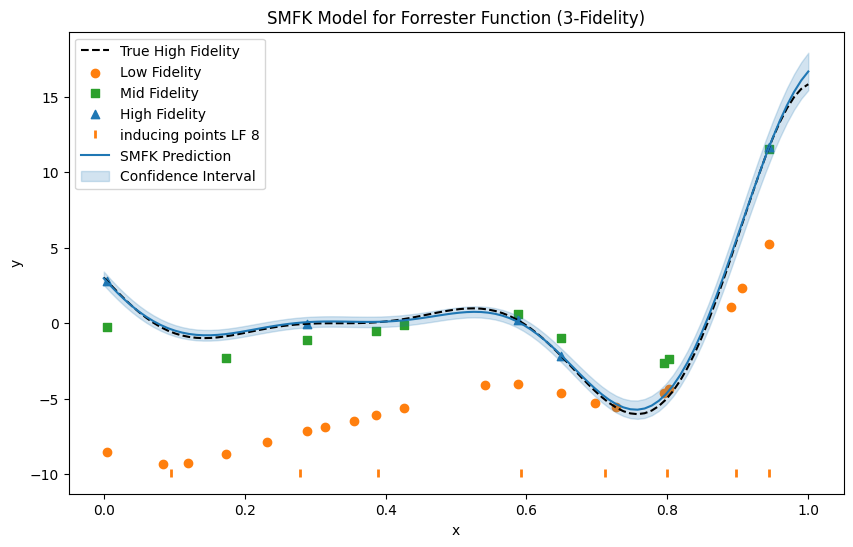

In [8]:
ndoe = 5  # DoE for the Nested experiment, definition of the observations in HF

xdoes = NestedLHS(nlevel=3, xlimits=np.array([[0, 1]]))
X_L, X_M, X_H = xdoes(ndoe)

y_L = forrester_low(X_L)
y_M = forrester_mid(X_M)
y_H = forrester_high(X_H)

n_start = 1
noise_bounds = np.array((0.001, 100))
theta0 = np.array([[2.2], [1.2], [1.2]])
theta_bounds = [1e-4, 200.0]
M = 8
# Train the SMFK model
smfk = SMFK(
    hyper_opt="Cobyla",
    n_inducing=M,
    eval_noise=True,
    theta0=theta0,
    theta_bounds=theta_bounds,
    noise_bounds=noise_bounds,
    propagate_uncertainty=False,
    n_start=n_start,
)
smfk.set_training_values(X_L, y_L, name=0)  # Low fidelity
smfk.set_training_values(X_M, y_M, name=1)  # Medium fidelity
smfk.set_training_values(X_H, y_H)  # High fidelity
smfk.train()

# Predict
X_test = np.linspace(0, 1, 100).reshape(-1, 1)
y_pred = smfk.predict_values(X_test)
y_var = smfk.predict_variances(X_test)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(X_test, forrester_high(X_test), "k--", label="True High Fidelity")


plt.scatter(X_L, y_L, label="Low Fidelity", color="tab:orange", marker="o")
plt.scatter(X_M, y_M, label="Mid Fidelity", color="tab:green", marker="s")
plt.scatter(X_H, y_H, label="High Fidelity", color="tab:blue", marker="^")

plt.plot(
    smfk.Z, -9.9 * np.ones_like(smfk.Z), "C1|", mew=2, label=f"inducing points LF {M}"
)


plt.plot(X_test, y_pred, "C0", label="SMFK Prediction")
plt.fill_between(
    X_test.ravel(),
    (y_pred - 2 * np.sqrt(y_var)).ravel(),
    (y_pred + 2 * np.sqrt(y_var)).ravel(),
    color="C0",
    alpha=0.2,
    label="Confidence Interval",
)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("SMFK Model for Forrester Function (3-Fidelity)")
plt.show()